<a href="https://colab.research.google.com/github/maxigaarp/Gestion-De-Datos-en-R/blob/main/Taller_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vectorizacion

Hay operaciones que, si las aplicamos a un vector, son aplicadas a todos sus elementos.



In [ ]:
mi_vector <- 1:10

mi_vector

[1]  1  2  3  4  5  6  7  8  9 10

In [ ]:
mi_vector ^ 2

[1]   1   4   9  16  25  36  49  64  81 100

Esto es mucho mas facil y rapido que a aplicar el exponente a cada elemento del vector. 

Como todo lo que ocurre en R es una función, podemos decir que al vectorizar estamos aplicando una función a cada elemento de un vector. La familia de funciones apply nos permite implementar esto en estructuras de datos distintas a los vectores.

## Funciones


Recordemos que en R podemos definir funciones, es decir
area_cuad <- function(lado1, lado2) {
  lado1 * lado2
}

In [ ]:
es_primo <-function(numero){
  if(numero<2){
    return(FALSE)
  }
  if(numero == 2){
    return(TRUE)
  }
  for(i in 2:(numero-1)){
    if(numero%%i == 0){
      return(FALSE)
    }
  }
  return(TRUE)
}

print(es_primo(123121))
print(es_primo(123121231))

[1] TRUE
[1] FALSE


In [ ]:
es_primo(2)

[1] TRUE

Sin embargo, si queremos aplicar esta función a un vector o serie de elementos, empezamos a observar problemas

In [ ]:
print(es_primo(mi_vector))

Warning message in if (numero < 2) {:
“the condition has length > 1 and only the first element will be used”


[1] FALSE


In [ ]:
for(c in mi_vector){
  print(es_primo(c))
}

[1] FALSE
[1] FALSE
[1] TRUE
[1] FALSE
[1] TRUE
[1] FALSE
[1] TRUE
[1] FALSE
[1] FALSE
[1] FALSE


El problema de esta solución es adaptarlo a data frames (consumo de memoria) y tiempo de ejecución. 

## Apply
Existen muchas funciones de la familia apply y todas tienen alguna aplicacion especifica, 
 * apply()
 * eapply()
 * lapply()
 * mapply() 
 * rapply()
 * sapply()
 * tapply()
 * vapply()

Como caracteristica general, todas las funciones de esta familia tienen una característica en común: reciben como argumentos a un objeto y al menos una función.

Veremos las principales que son apply y lapply


Apply: es la función central de esta familia, lo que hace es aplicar funciones **vectoriales** sobre matrices (o data frames). 

Esta función se aplica sobre la matriz de la siguiente forma:

apply(MATRIX, MARGIN, FUN)

MATRIX en la que uno quiere aplicar la función, por ejemplo nuestra BBDD

MARGIN es la dimensión en que uno quiere aplicar la función. Si el valor es 1 la función se aplica en cada fila, si el valor es 2, se aplica en cada columna. si el valor es c(1,2) se aplica en cada elemento, mientras que si el valor es c(2,1) se devuelve la matriz transpuesta. En los dos últimos casos se retorna siempre una matriz, no una bbdd.

FUN es la función que uno determina.

Es especialmente importante conocer bien la función y entender que va  a retornar apply.

In [ ]:
apply(mi_vector, MARGIN = 1, FUN = es_primo)

ERROR: ignored

In [ ]:
mi_matriz = matrix(mi_vector, nrow = 2)
mi_matriz
apply(mi_matriz, MARGIN = 2, FUN = es_primo)

1,3,5,7,9
2,4,6,8,10


Warning message in if (numero < 2) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (numero < 2) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (numero == 2) {:
“the condition has length > 1 and only the first element will be used”
Warning message in 2:(numero - 1):
“numerical expression has 2 elements: only the first used”
Warning message in if (numero%%i == 0) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (numero < 2) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (numero == 2) {:
“the condition has length > 1 and only the first element will be used”
Warning message in 2:(numero - 1):
“numerical expression has 2 elements: only the first used”
Warning message in if (numero%%i == 0) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (numero%%i == 0) 

[1] FALSE  TRUE  TRUE  TRUE FALSE

In [ ]:
mi_matriz = matrix(mi_vector, nrow = 2)
mi_matriz
apply(mi_matriz, MARGIN = 2, FUN = sum)

1,3,5,7,9
2,4,6,8,10


[1]  3  7 11 15 19

In [ ]:
mi_matriz = matrix(mi_vector, nrow = 2)
mi_matriz
apply(mi_matriz, MARGIN = c(1,2), FUN = es_primo)

1,3,5,7,9
2,4,6,8,10


FALSE,TRUE,TRUE,TRUE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE


In [ ]:
mi_matriz = matrix(mi_vector, nrow = 2)
mi_matriz
apply(mi_matriz, MARGIN = c(2,1), FUN = es_primo)

1,3,5,7,9
2,4,6,8,10


FALSE,TRUE
TRUE,FALSE
TRUE,FALSE
TRUE,FALSE
FALSE,FALSE


Por otra parte, lapply es un caso especial de apply, diseñado para aplicar funciones a todos los elementos de una lista, retornando una lista.

lapply(LIST, FUN)

LIST es la lista que entregamos

FUN es nuestra función

Siempre retorna una lista



In [ ]:
lapply(mi_vector, es_primo)

[[1]]
[1] FALSE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] FALSE

[[5]]
[1] TRUE

[[6]]
[1] FALSE

[[7]]
[1] TRUE

[[8]]
[1] FALSE

[[9]]
[1] FALSE

[[10]]
[1] FALSE

Uno puede crear funciones sabiendo con que tipo de elementos va a trabajar, y apply() permite resolver los problemas de forma muy eficiente.

In [ ]:
suma_es_primo <-function(x){
  numero <- sum(x)
  if(numero<2){
    return(FALSE)
  }
  if(numero == 2){
    return(TRUE)
  }
  for(i in 2:(numero-1)){
    if(numero%%i == 0){
      return(FALSE)
    }
  }
  return(TRUE)
}


In [ ]:
mi_matriz = matrix(mi_vector, nrow = 5)
mi_matriz
apply(mi_matriz,MARGIN = 1, FUN = suma_es_primo)

1,6
2,7
3,8
4,9
5,10


[1]  TRUE FALSE  TRUE  TRUE FALSE

# Descargar datos

Ir a https://www.cr2.cl/datos-de-precipitacion/?cp_Precipitacion=2

Descargar datos del 2019

In [ ]:
unzip("/content/cr2_prAmon_2019.zip")

In [ ]:
x <- read.csv("/content/cr2_prAmon_2019/cr2_prAmon_2019.txt", na = "-9999", header =F)



In [ ]:
x

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V871,V872,V873,V874,V875,V876,V877,V878,V879,V880
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
codigo_estacion,1000005,1200002,1200003,1201005,1201010,1201003,1001005,1110001,1202009,⋯,330021,330019,330031,330030,370033,420004,430002,430004,510005,530005
institucion,DGA,DGA,DGA,DGA,DGA,DGA,DGA,DGA,DGA,⋯,DMC,DMC,DMC,DMC,DMC,DMC,DMC,DMC,DMC,DMC
fuente,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,⋯,dmc_web,dmc_web,dmc_web,dmc_web,dmc_web,dmc_web,dmc_web,dmc_web,dmc_web,dmc_web
nombre,Visviri,Villa Industrial (Tacora),Humapalca,Rio Caracarani En Humapalca,Alcerreca,Rio Lluta En Alcerreca,Caquena,Puquios,Pacollo,⋯,Pudahuel Santiago,Eulogio Sanchez Tobalaba Ad.,Juan Fernandez Estacion Meteorologica,Santo Domingo Ad.,Maria Dolores Los Angeles Ad.,Chaiten Ad.,Futaleufu Ad.,Alto Palenaad.,Teniente Gallardo Puerto Natales Ad.,Fuentes Martinez Porvenir Ad.
altura,4080,4080,3980,3908,3990,3550,4400,3750,4185,⋯,482,650,35,75,120,10,347,281,69,27
latitud,-17.595,-17.7719,-17.835,-17.8428,-17.9931,-18.0036,-18.0542,-18.1747,-18.1769,⋯,-33.3919,-33.4544,-33.6367,-33.655,-37.4028,-42.9303,-43.1889,-43.6117,-51.6672,-53.1875
longitud,-69.4831,-69.7244,-69.7039,-69.6994,-69.6594,-69.6331,-69.2017,-69.7439,-69.5092,⋯,-70.7944,-70.5478,-78.835,-71.6142,-72.4225,-72.7008,-71.8525,-71.8053,-72.5289,-70.3203
codigo_cuenca,10,12,12,12,12,12,10,11,12,⋯,57,57,50,50,81,104,104,104,122,128
nombre_cuenca,Altiplanicas,Rio Lluta,Rio Lluta,Rio Lluta,Rio Lluta,Rio Lluta,Altiplanicas,Quebrada De La Concordia,Rio Lluta,⋯,Rio Maipo,Rio Maipo,Costeras Quilimari-Petorca,Costeras Quilimari-Petorca,Rio Itata,Cuencas E Islas Entre R.Bueno Y R. Puelo,Cuencas E Islas Entre R.Bueno Y R. Puelo,Cuencas E Islas Entre R.Bueno Y R. Puelo,Costeras Entre Seno Andrew Y R. Hollemberg E Islas Al Oriente,Tierra Del Fuego


In [ ]:
y <- setNames(as.data.frame(t(x[,-1])),as.character(x[,1]))
y[,1:20]

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_cuenca,codigo_sub_cuenca,nombre_sub_cuenca,inicio_observaciones,fin_observaciones,cantidad_observaciones,inicio_automatica,1900-01,1900-02,1900-03,1900-04,1900-05
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
V2,1000005,DGA,dga_web,Visviri,4080,-17.595,-69.4831,10,Altiplanicas,100,Entre Limite Peru-Bolivia Y Rio Lauca,1968-05-01,2019-12-31,18167,2017-08-02,NA,NA,NA,NA,NA
V3,1200002,DGA,dga_web,Villa Industrial (Tacora),4080,-17.7719,-69.7244,12,Rio Lluta,120,Rio Lluta Alto,1975-01-01,2019-11-30,15794,-,NA,NA,NA,NA,NA
V4,1200003,DGA,dga_web,Humapalca,3980,-17.835,-69.7039,12,Rio Lluta,120,Rio Lluta Alto,1971-12-01,2019-11-30,17393,-,NA,NA,NA,NA,NA
V5,1201005,DGA,dga_web,Rio Caracarani En Humapalca,3908,-17.8428,-69.6994,12,Rio Lluta,120,Rio Lluta Alto,2013-06-01,2019-12-31,2185,2017-04-04,NA,NA,NA,NA,NA
V6,1201010,DGA,dga_web,Alcerreca,3990,-17.9931,-69.6594,12,Rio Lluta,120,Rio Lluta Alto,1971-01-01,2019-11-30,17563,-,NA,NA,NA,NA,NA
V7,1201003,DGA,dga_web,Rio Lluta En Alcerreca,3550,-18.0036,-69.6331,12,Rio Lluta,120,Rio Lluta Alto,2001-12-01,2019-12-31,6277,2017-09-15,NA,NA,NA,NA,NA
V8,1001005,DGA,dga_web,Caquena,4400,-18.0542,-69.2017,10,Altiplanicas,100,Entre Limite Peru-Bolivia Y Rio Lauca,1970-01-01,2019-12-30,16160,-,NA,NA,NA,NA,NA
V9,1110001,DGA,dga_web,Puquios,3750,-18.1747,-69.7439,11,Quebrada De La Concordia,111,Quebrada De La Concordia,1975-05-01,1981-05-31,2105,-,NA,NA,NA,NA,NA
V10,1202009,DGA,dga_web,Pacollo,4185,-18.1769,-69.5092,12,Rio Lluta,120,Rio Lluta Alto,1978-11-01,1999-05-31,7395,-,NA,NA,NA,NA,NA


In [ ]:
y10 <- y %>% select(c(1,6,7,tail(names(y), 12*10)))
y10


ERROR: ignored

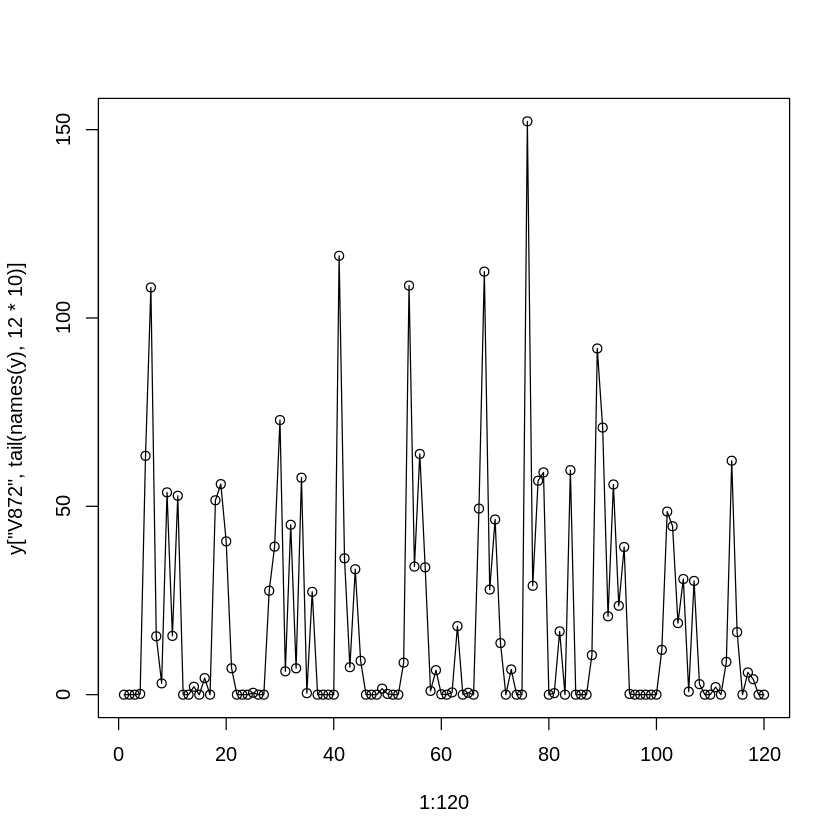

In [ ]:
plot(1:120,y["V872",tail(names(y), 12*10)])
lines(1:120,y["V872",tail(names(y), 12*10)])

In [ ]:
y10 %>%
  mutate(count = rowSums(is.na(y10)))%>%
  filter(count<5)


,codigo_estacion,latitud,longitud,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,⋯,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
V2,1000005,-17.595,-69.4831,38.3,16,5,2,0,0,0,⋯,2.6,6.2,1.2,1.8,0,11.8,14.6,12.8,30.6,1
V3,1200002,-17.7719,-69.7244,5,14,4,0,0,0,0,⋯,0.6,2.2,0.4,0.2,0.6,1.4,3.6,2.8,NA,4
V4,1200003,-17.835,-69.7039,0,58,15,5,1,0,0,⋯,0,0,0,2,0,0,2,11,NA,2
V6,1201010,-17.9931,-69.6594,25,8,0,0,0,0,0,⋯,0.3,0.2,0,0.6,0.2,0,0,0,NA,4
V7,1201003,-18.0036,-69.6331,13.1,18.7,1.8,0.5,2.1,0,0,⋯,0.3,0.5,0,0.3,0,0,0,0.5,0.9,1
V14,1202012,-18.195,-69.5589,5.8,9.8,0.6,0.3,3.6,0,0,⋯,0,2.4,0,7.2,0,0,0,0,2.8,3
V17,1020017,-18.2042,-69.2683,42.5,45,25.5,10,2.5,0,0,⋯,1.6,1.4,0,0.3,0,0.9,5.1,19.4,4.5,2
V19,1020016,-18.2164,-69.2956,79,76,15,0,0,0,0,⋯,0.2,1.2,0,1.2,0,6.6,4.3,8.8,23.8,4
V23,1010007,-18.2808,-69.1383,76,82,18,0,0,0,0,⋯,1.6,1,0,0,0,13,3.3,13.1,NA,2


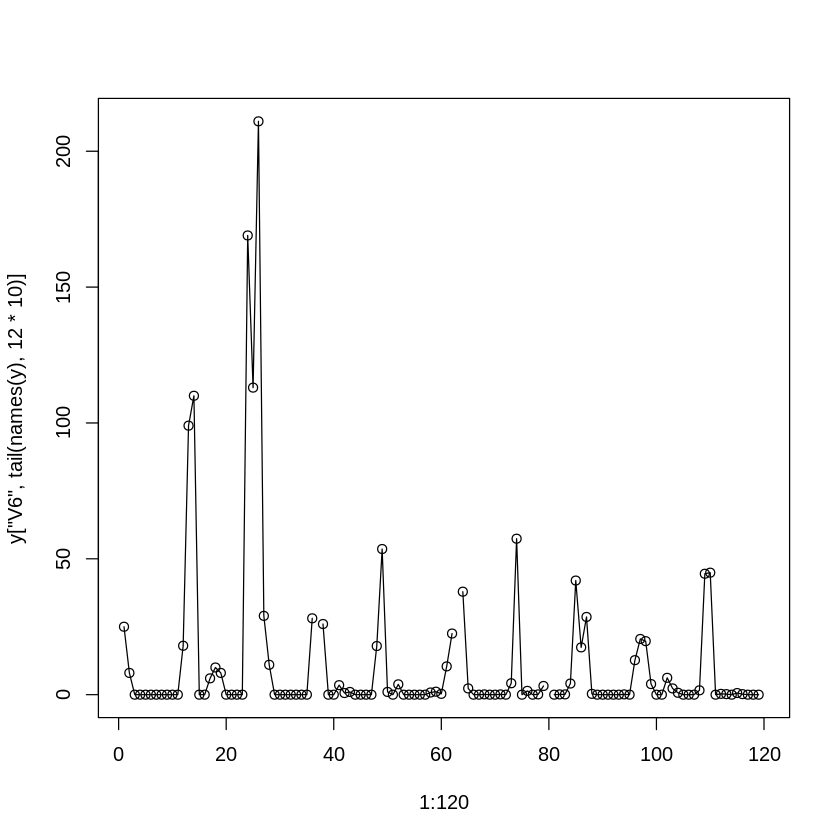

In [ ]:
plot(1:120,y["V6",tail(names(y), 12*10)])
lines(1:120,y["V6",tail(names(y), 12*10)])

In [ ]:
y10_pivot <- data.frame(apply(y10, 2, function(x) as.numeric(as.character(x)))) %>% 
        pivot_longer(cols = X2010.01:X2019.12,
        names_to = c("Año", "Mes"),
        names_pattern = "X(....).(..)")

y10_pivot

codigo_estacion,latitud,longitud,Año,Mes,value
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1000005,-17.595,-69.4831,2010,01,38.3
1000005,-17.595,-69.4831,2010,02,16.0
1000005,-17.595,-69.4831,2010,03,5.0
1000005,-17.595,-69.4831,2010,04,2.0
1000005,-17.595,-69.4831,2010,05,0.0
1000005,-17.595,-69.4831,2010,06,0.0
1000005,-17.595,-69.4831,2010,07,0.0
1000005,-17.595,-69.4831,2010,08,0.0
1000005,-17.595,-69.4831,2010,09,0.0


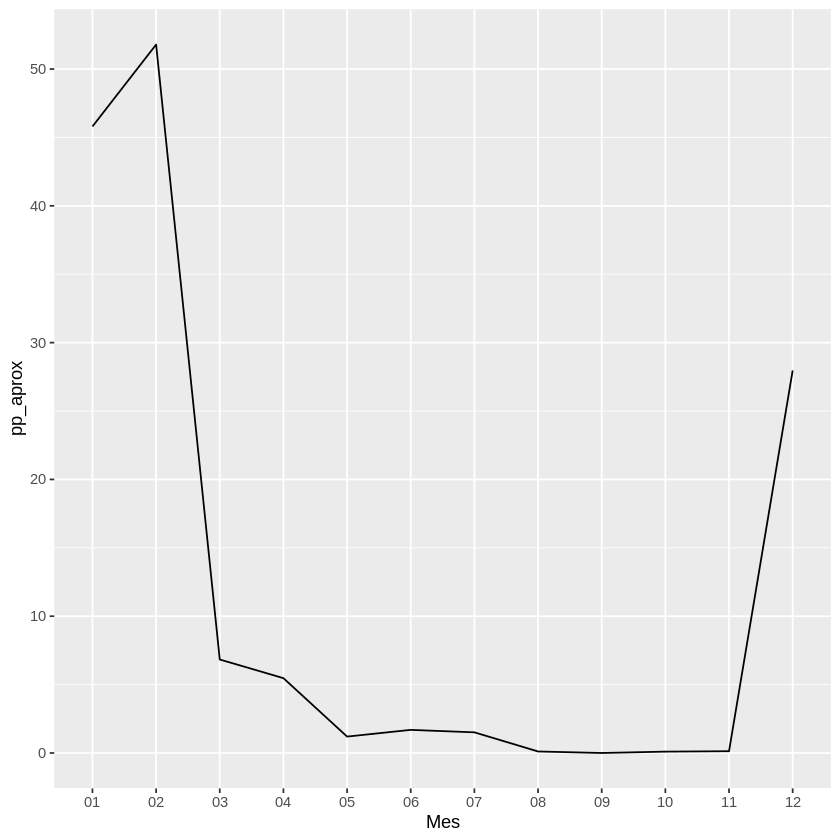

In [ ]:
y10_pivot %>% filter(codigo_estacion==1201010)%>%
              group_by(Mes)%>%
              summarise(pp_aprox=mean(value, na.rm=T))%>%
              ggplot() + geom_line(aes(x=Mes, y=pp_aprox, group = 1))



Actividad:

 * Elija una posicion geografica que sea de su interes (para eso vaya a google maps busque un lugar y luego le extrae la latitud y longitud). Busque las 5 estaciones más cercanas a ese punto y calcule la interpolacion (inversa) en el punto para los 12 años de historia.

#Ciudades

In [ ]:
system("gdown --id 12AbTGkP0v0kfS-Uc_nTBPniDYtEygl5U")

In [ ]:
tab <- read.csv("/content/colesgeo.csv")

ERROR: ignored

In [ ]:
tab

X,RBD,NOM_RBD,NOM_COM_RBD,query,lon,lat
<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,1,LICEO POLITECNICO ARICA,ARICA,"LICEO POLITECNICO ARICA , ARICA",-70.29469,-18.48719
2,3,ESC. PEDRO VICENTE GUTIERREZ TORRES,ARICA,"ESC. PEDRO VICENTE GUTIERREZ TORRES , ARICA",-70.30278,-18.48696
3,4,LICEO OCTAVIO PALMA PEREZ,ARICA,"LICEO OCTAVIO PALMA PEREZ , ARICA",-70.30792,-18.47417
4,5,JOVINA NARANJO FERNANDEZ,ARICA,"JOVINA NARANJO FERNANDEZ , ARICA",-70.31345,-18.47680
5,7,L. POLI. ANTONIO VARAS DE LA BARRA,ARICA,"L. POLI. ANTONIO VARAS DE LA BARRA , ARICA",-70.28795,-18.47595
6,8,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,ARICA,"COLEGIO INTEGRADO EDUARDO FREI MONTALVA , ARICA",-70.31737,-18.48267
7,9,ESCUELA REPUBLICA DE ISRAEL,ARICA,"ESCUELA REPUBLICA DE ISRAEL , ARICA",-70.30278,-18.48696
8,10,ESCUELA REPUBLICA DE FRANCIA,ARICA,"ESCUELA REPUBLICA DE FRANCIA , ARICA",-70.30892,-18.47422
9,11,ESC. GRAL. PEDRO LAGOS MARCHANT,ARICA,"ESC. GRAL. PEDRO LAGOS MARCHANT , ARICA",-70.31159,-18.49111


# Actividad:

 * Detectar errores en la base de datos de ciudades, para esto:
    * Partir buscando los valores faltantes y analizando la fuente de error.
    * Luego fijarse en la latitud y longitud, revisar si no tienen algun valor anomalo.
    * ¿Que regla sería adecuada para validar los datos en este set de datos de colegios chilenos?


[1] 190

# Extra

Descargando datos de localizacion geografica por Gmaps

In [ ]:
library(tidyverse)

In [ ]:
install.packages("ggmap")
library(ggmap)

register_google(key="xxx")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘RgoogleMaps’, ‘png’, ‘plyr’, ‘rjson’, ‘jpeg’, ‘bitops’




##Probando

In [ ]:
cole <- geocode(c("COLEGIO INTEGRADO EDUARDO FREI MONTALVA", "ESC. GRAL. PEDRO LAGOS MARCHANT"))

Source : https://maps.googleapis.com/maps/api/geocode/json?address=COLEGIO+INTEGRADO+EDUARDO+FREI+MONTALVA&key=xxx

Source : https://maps.googleapis.com/maps/api/geocode/json?address=ESC.+GRAL.+PEDRO+LAGOS+MARCHANT&key=xxx



In [ ]:
cole

lon,lat
<dbl>,<dbl>
-70.31737,-18.48267
-70.31159,-18.49111


In [ ]:
system("gdown --id 1Z6Ovkxii2V5dVXC3k0Yl4m2nwIoZyOBb")

In [ ]:
install.packages("RSQLite")
library(RSQLite)
conn <- dbConnect(RSQLite::SQLite(), "mineduc_rendim.db")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘bit64’, ‘plogr’




In [ ]:
coles <- dbGetQuery(conn,
"select RBD,
        NOM_RBD,
        NOM_COM_RBD 
from colegios
where AGNO==2017
group by RBD")

In [ ]:
coles <- coles %>% mutate(query = gsub("�", "Ñ",paste(NOM_RBD,", " , NOM_COM_RBD)))

In [ ]:
geo <- geocode(coles$query)

Streaming output truncated to the last 5000 lines.
Source : https://maps.googleapis.com/maps/api/geocode/json?address=COLEGIO+HORIZONTES+,+COQUIMBO&key=xxx

Source : https://maps.googleapis.com/maps/api/geocode/json?address=ESCUELA+SAN+MARINO+COLLEGE+,+COQUIMBO&key=xxx

Source : https://maps.googleapis.com/maps/api/geocode/json?address=COLEGIO+HELLEN+KELLER+PE%C3%91UELAS+,+COQUIMBO&key=xxx

Source : https://maps.googleapis.com/maps/api/geocode/json?address=LICEO+MIXTO+LOS+ANDES+,+LOS+ANDES&key=xxx

Source : https://maps.googleapis.com/maps/api/geocode/json?address=COLEGIO+PANQUEHUE+,+PANQUEHUE&key=xxx

Source : https://maps.googleapis.com/maps/api/geocode/json?address=LICEO+AGRICOLA+DE+QUILLOTA+,+QUILLOTA&key=xxx

Source : https://maps.googleapis.com/maps/api/geocode/json?address=CENTRO+INTEGRAL+DE+EDUCACION+DE+ADULTOS+,+QUILLOTA&key=xxx

Source : https://maps.googleapis.com/maps/api/geocode/json?address=COLEGIO+BECARB+II+,+CALERA&key=xxx

"COLEGIO BECARB II..." not uniquely geocoded, 

In [ ]:
cbind(coles,geo)

RBD,NOM_RBD,NOM_COM_RBD,query,lon,lat
<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,LICEO POLITECNICO ARICA,ARICA,"LICEO POLITECNICO ARICA , ARICA",-70.29469,-18.48719
3,ESC. PEDRO VICENTE GUTIERREZ TORRES,ARICA,"ESC. PEDRO VICENTE GUTIERREZ TORRES , ARICA",-70.30278,-18.48696
4,LICEO OCTAVIO PALMA PEREZ,ARICA,"LICEO OCTAVIO PALMA PEREZ , ARICA",-70.30792,-18.47417
5,JOVINA NARANJO FERNANDEZ,ARICA,"JOVINA NARANJO FERNANDEZ , ARICA",-70.31345,-18.47680
7,L. POLI. ANTONIO VARAS DE LA BARRA,ARICA,"L. POLI. ANTONIO VARAS DE LA BARRA , ARICA",-70.28795,-18.47595
8,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,ARICA,"COLEGIO INTEGRADO EDUARDO FREI MONTALVA , ARICA",-70.31737,-18.48267
9,ESCUELA REPUBLICA DE ISRAEL,ARICA,"ESCUELA REPUBLICA DE ISRAEL , ARICA",-70.30278,-18.48696
10,ESCUELA REPUBLICA DE FRANCIA,ARICA,"ESCUELA REPUBLICA DE FRANCIA , ARICA",-70.30892,-18.47422
11,ESC. GRAL. PEDRO LAGOS MARCHANT,ARICA,"ESC. GRAL. PEDRO LAGOS MARCHANT , ARICA",-70.31159,-18.49111


In [ ]:
write.csv(cbind(coles,geo), "colesgeo.csv")